Baseline Model for Building Destruction Classification

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


We start by reading data in from the cal_fire_data_cleaned CSV file:

In [16]:
cal_fire_data = pd.read_csv("../data/cal_fire_data_cleaned.csv")
cal_fire_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42789 entries, 0 to 42788
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   * Structure Type                             42789 non-null  object 
 1   * Roof Construction                          42789 non-null  object 
 2   * Eaves                                      42789 non-null  object 
 3   * Vent Screen                                42789 non-null  object 
 4   * Exterior Siding                            42789 non-null  object 
 5   * Window Pane                                42789 non-null  object 
 6   * Deck/Porch On Grade                        42789 non-null  object 
 7   * Deck/Porch Elevated                        42789 non-null  object 
 8   * Patio Cover/Carport Attached to Structure  42789 non-null  object 
 9   * Fence Attached to Structure                42789 non-null  object 
 10

We set our feature and target variables and create a train/test split (80%/20%):

In [17]:
from sklearn.model_selection import train_test_split

X = cal_fire_data.drop(columns='Destroyed')
y = cal_fire_data['Destroyed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=216, stratify=y)
y.value_counts(normalize=True)


Destroyed
0    0.59763
1    0.40237
Name: proportion, dtype: float64

For our baseline model, we just classify every observation as the most frequent class in the dataset. 

In [18]:
from sklearn.dummy import DummyClassifier

baseline_clf = DummyClassifier(strategy='most_frequent')
baseline_clf.fit(X_train, y_train)
y_pred = baseline_clf.predict(X_test)


Along with the prediction accuracy, we have a classification report that includes precision, recall, and f1 scores:

In [19]:
from sklearn.metrics import accuracy_score, classification_report

baseline_test_acc = accuracy_score(y_test, y_pred)
print("accuracy: ", baseline_test_acc)
print("\nreport: \n")
print(classification_report(y_test,y_pred))


accuracy:  0.5976863753213367

report: 

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      5115
           1       0.00      0.00      0.00      3443

    accuracy                           0.60      8558
   macro avg       0.30      0.50      0.37      8558
weighted avg       0.36      0.60      0.45      8558



/Users/kevin/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kevin/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kevin/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

We also have a confusion matrix showing how the model performed across classes:

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


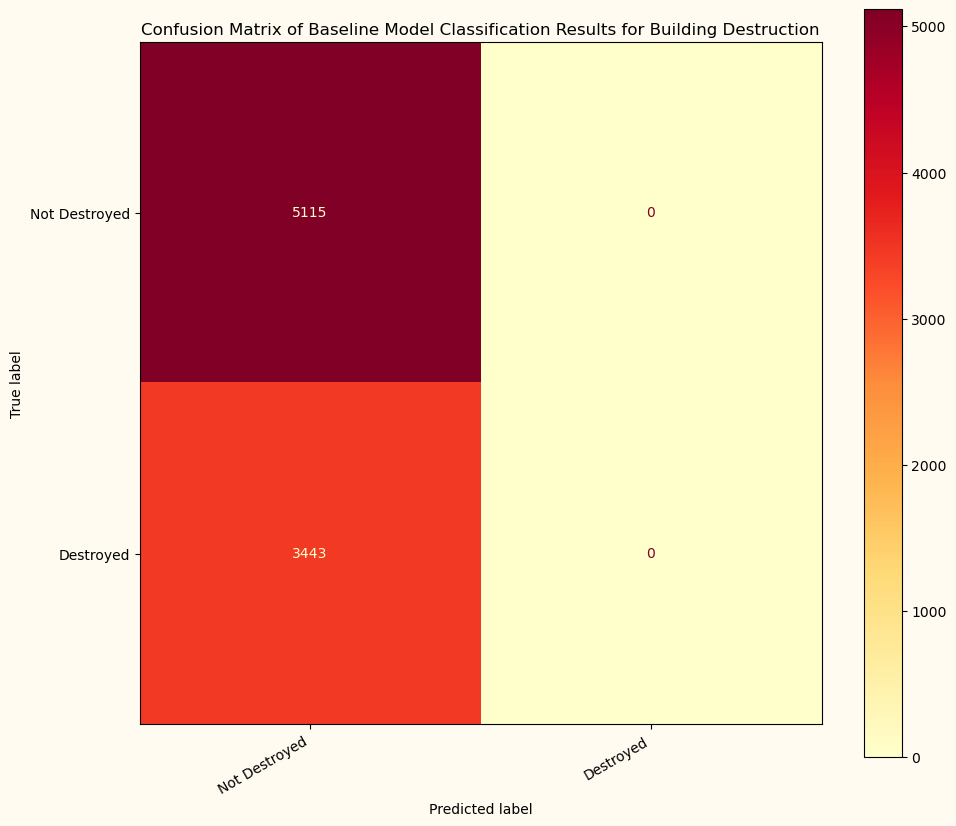

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Destroyed', 'Destroyed'])
fig, ax = plt.subplots(figsize=(11, 11), facecolor = ('#fffbf0'))
disp.plot(ax=ax, cmap='YlOrRd')
fig.autofmt_xdate()
plt.title("Confusion Matrix of Baseline Model Classification Results for Building Destruction")
plt.show()
